# Datasets and DataLoader

Imports

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image

Training and Testing data

In [2]:
training_data = datasets.FashionMNIST(
root = "data",
train = True,
download = True,
transform = ToTensor()
)

testing_data = datasets.FashionMNIST(
root = "data",
train = False,
download = True,
transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 115675366.71it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4127596.78it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 46095752.46it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


100%|██████████| 5148/5148 [00:00<00:00, 7863174.43it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Display

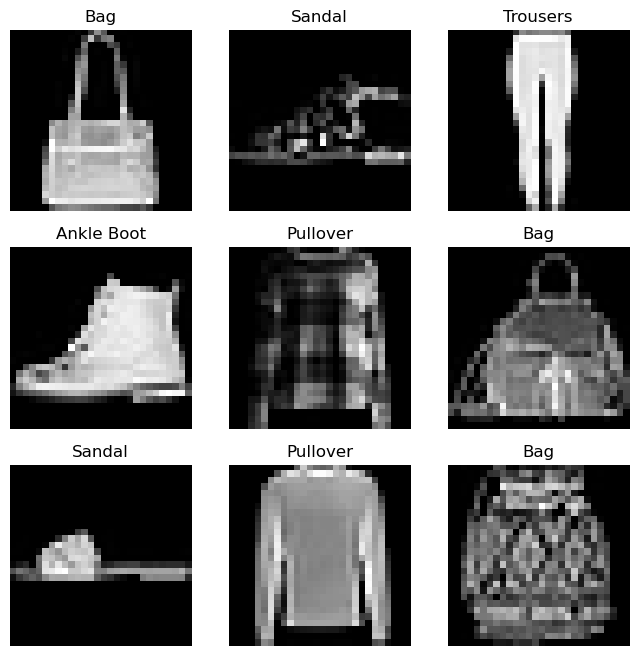

In [3]:
labels_map = {
    0: "Tshirts",
    1: "Trousers",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))

col, row = 3,3

for i in range(1,col*row +1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    
    img, label = training_data[sample_idx]
    
    figure.add_subplot(row, col, i)
    
    plt.title(labels_map[label])
    
    plt.axis("off")
    
    plt.imshow(img.squeeze(), cmap = "gray")
    
plt.show()

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_label = pd.read_csv(annotations_file)
        self.img_dir = pd.read_csv(img_dir)
        self.transform = transorm
        self.target_transform = target_transform
        
    def __len__(self):
        return(len(self.img_label))
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_label.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_label.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

In [5]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(testing_data, batch_size = 64, shuffle = True)

Feature Batch shape : torch.Size([64, 1, 28, 28])
Label Batch shape : torch.Size([64])
Label : 5


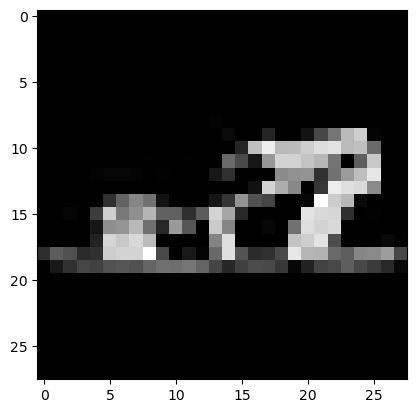

In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature Batch shape : {train_features.size()}")
print(f"Label Batch shape : {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
print(f"Label : {label}")

plt.imshow(img, cmap = "gray")
plt.show()

